# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings("ignore")


# Dataset

In [2]:
df = pd.read_csv('covid_19_clean_complete 17042020.csv', parse_dates=['Date'])

# Preprocessing 

### Cleaning data

In [3]:
# cases
cases=['Confirmed', 'Deaths', 'Recovered', 'Active']

#Active Cases = confirmed - deaths - recovered
df['Active']=df['Confirmed']-df['Deaths']-df['Recovered']

#Replace Mainland china with just China
df['Country/Region'] = df['Country/Region'].replace('Mainland China', 'China')

#filling missing values
df[['Province/State']]= df[['Province/State']].fillna('')
df[cases]=df[cases].fillna(0)                            

In [4]:
df.head()

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0                      Thailand  15.0000  101.0000 2020-01-22          2   
1                         Japan  36.0000  138.0000 2020-01-22          2   
2                     Singapore   1.2833  103.8333 2020-01-22          0   
3                         Nepal  28.1667   84.2500 2020-01-22          0   
4                      Malaysia   2.5000  112.5000 2020-01-22          0   

   Deaths  Recovered  Active  
0       0          0       2  
1       0          0       2  
2       0          0       0  
3       0          0       0  
4       0          0       0

In [5]:
df.shape

(92939, 9)

### Derived Tables

Given that there are many cases in cruise ships did not classify which country they are from, we will separate the cases in cruise ships. 


In [6]:
#Grouped data
df_grouped = df.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

#New Cases
df_grouped['New Case'] = df_grouped.groupby(['Country/Region'])['Confirmed'].diff()
df_grouped['New Case']= df_grouped['New Case'].fillna(0)
df_grouped['New Case']= df_grouped['New Case'].apply(np.int64)

#China and the Rest of the world
China = df_grouped[df_grouped['Country/Region']=='China']
ROW = df_grouped[df_grouped['Country/Region']!='China']

#Latest
df_latest = df_grouped[df_grouped['Date']== max(df_grouped['Date'])].reset_index()

#Latest grouped
df_latest_grouped = df_latest.groupby(['Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active', 'New Case'].sum().reset_index()


In [7]:
df_grouped.head()

Country/Region       Date  Confirmed  Deaths  Recovered  Active  New Case
0    Afghanistan 2020-01-22          0       0          0       0         0
1    Afghanistan 2020-01-23          0       0          0       0         0
2    Afghanistan 2020-01-24          0       0          0       0         0
3    Afghanistan 2020-01-25          0       0          0       0         0
4    Afghanistan 2020-01-26          0       0          0       0         0

# Maps

In [8]:
fig = px.choropleth(df_latest_grouped, locations='Country/Region', locationmode='country names', 
                    color= np.log(df_latest_grouped['Confirmed']), 
                    hover_name='Country/Region', hover_data=['Confirmed'], 
                    color_continuous_scale='Sunsetdark', range_color=(0, 12), 
                   title='Countries with Confirmed Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [9]:
fig = px.choropleth(df_latest_grouped, locations='Country/Region', locationmode='country names', 
                    color= np.log(df_latest_grouped['Deaths']), 
                    hover_name='Country/Region', hover_data=['Deaths'], 
                    color_continuous_scale='PuBu', range_color=(0, 12), 
                   title='Countries with Deaths Reported')
fig.update(layout_coloraxis_showscale=False)
fig.show()

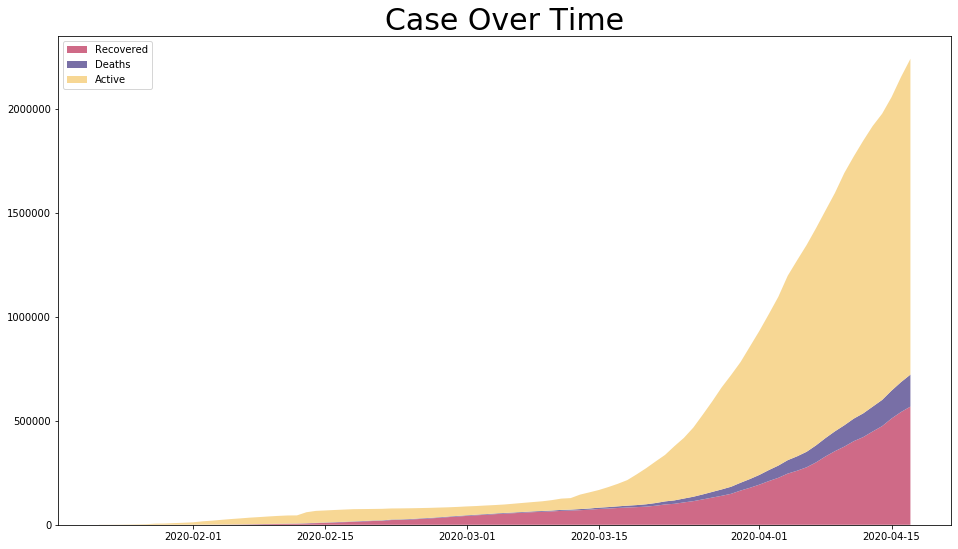

In [10]:
temp=df.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
x=temp['Date'].values
y1=temp['Recovered'].values
y2=temp['Deaths'].values
y3=temp['Active'].values
colors=['#cf6a87', '#786fa6', '#f7d794']
plt.figure(figsize=(16, 9))
plt.stackplot(x, y1, y2, y3, labels=['Recovered', 'Deaths', 'Active'], colors=colors)
plt.legend(loc='upper left')
plt.title('Case Over Time', size=30)
plt.show()

# Data Exploration

## Percentage of Recovered, Death and Active cases

### Worldwide

In [11]:
daily_total = df.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
current_total = daily_total[daily_total['Date']==max(daily_total['Date'])].reset_index(drop=True)

In [12]:
current_total

Date  Confirmed  Deaths  Recovered   Active
0 2020-04-17    2240191  153822     568343  1518026

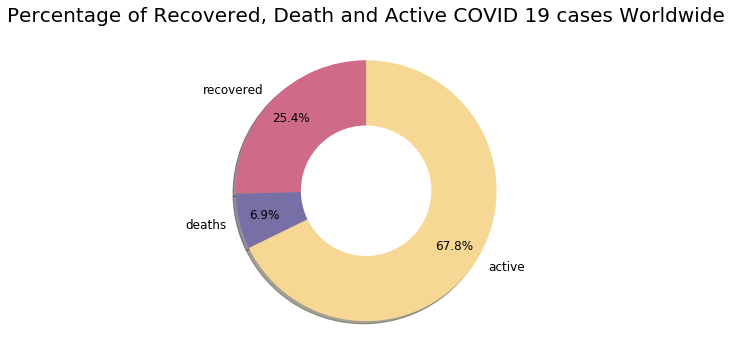

In [13]:
labels = 'recovered', 'deaths', 'active'
sizes=[current_total['Recovered'], current_total['Deaths'], current_total['Active']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, textprops={'fontsize':12}, autopct='%1.1f%%', shadow=True, 
        startangle=90, colors=custom_colours, pctdistance=0.8)

#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Recovered, Death and Active COVID 19 cases Worldwide', size=20)
plt.show()

The pie above shows that 25.4% of worldwide confirmed cases have recovered and the mortality rate is 6.9%

### China

In [14]:
daily_china=China.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active', 'New Case'].sum().reset_index()
China_current = daily_china[daily_china['Date']==max(daily_china['Date'])].reset_index(drop=True)

In [15]:
China_current

Date  Confirmed  Deaths  Recovered  Active  New Case
0 2020-04-17      83760    4636      77552    1572       357

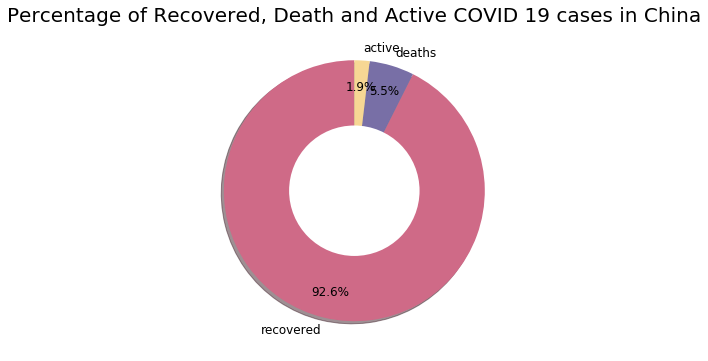

In [16]:
labels = 'recovered', 'deaths', 'active'
sizes=[China_current['Recovered'], China_current['Deaths'], China_current['Active']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, textprops={'fontsize':12}, autopct='%1.1f%%', shadow=True, 
        startangle=90, colors=custom_colours, pctdistance=0.8)

#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Recovered, Death and Active COVID 19 cases in China', size=20)
plt.show()

There are 92.6% people who confirmed COVID 19 in China have recovered and there are only 1.9% cases still active

### The rest of the world

In [17]:
daily_ROW=ROW.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active', 'New Case'].sum().reset_index()
ROW_current = daily_ROW[daily_ROW['Date']==max(daily_ROW['Date'])].reset_index(drop=True)

In [18]:
ROW_current

Date  Confirmed  Deaths  Recovered   Active  New Case
0 2020-04-17    2156431  149186     490791  1516454     87187

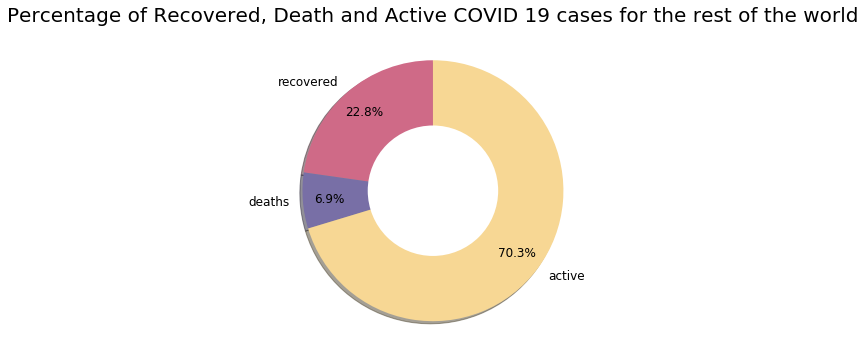

In [19]:
labels = 'recovered', 'deaths', 'active'
sizes=[ROW_current['Recovered'], ROW_current['Deaths'], ROW_current['Active']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, textprops={'fontsize':12}, autopct='%1.1f%%', shadow=True, 
        startangle=90, colors=custom_colours, pctdistance=0.8)

#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Recovered, Death and Active COVID 19 cases for the rest of the world', size=20)
plt.show()

There are 22.8% COVID cases recovered and 70.3% still active for the rest of the world

## Countrywise Data

### Confirmed, Death, Recovered, Active and New cases in each country

In [20]:
confirmed_df = df_latest_grouped.sort_values(by='Confirmed', ascending=False)
confirmed_df = confirmed_df.reset_index(drop=True)
cm = sns.light_palette("navy", as_cmap=True)
confirmed_df.style.background_gradient(cmap=cm)


### Death reported in coutries

In [53]:
# Calculate death rate
confirmed_df['Death Rate'] = round(confirmed_df['Deaths']/confirmed_df['Confirmed']*100, 2)
# Death report arranged based on death number
death_df = confirmed_df[confirmed_df['Deaths']>0][['Country/Region', 'Deaths', 'Death Rate']].head(20)
death_df = death_df.sort_values('Deaths', ascending=False).reset_index(drop=True)
death_df.style.background_gradient(cmap='Reds')

In [22]:
# Death report arranged based on death rate
death_df = confirmed_df[confirmed_df['Deaths']>0][['Country/Region', 'Death Rate', 'Deaths']].head(20)
death_df = death_df.sort_values('Death Rate', ascending=False).reset_index(drop=True)
death_df.style.background_gradient(cmap='Reds')

### Recovery reported in countries

In [23]:
# Calculate recovery rate
confirmed_df['Recovery Rate'] = round(confirmed_df['Recovered']/confirmed_df['Confirmed']*100, 2)
# Recovery report arranged based on recovered cases
recovery_df = confirmed_df[confirmed_df['Recovered']>0][['Country/Region', 'Recovered', 'Recovery Rate']].head(20)
recovery_df = recovery_df.sort_values('Recovered', ascending=False).reset_index(drop=True)
recovery_df.style.background_gradient(cmap='Blues')

In [24]:
# Recovery report arranged based on recovery rate
recovery_df = confirmed_df[confirmed_df['Recovered']>0][['Country/Region', 'Recovery Rate', 'Recovered']].head(20)
recovery_df = recovery_df.sort_values('Recovery Rate', ascending=False).reset_index(drop=True)
recovery_df.style.background_gradient(cmap='Blues')

### New case increase in countries

In [25]:
# Recovery report arranged based on recovery rate
new_case_df = confirmed_df[['Country/Region', 'New Case']].head(30)
new_case_df = new_case_df.sort_values('New Case', ascending=False).reset_index(drop=True)
new_case_df.style.background_gradient(cmap='Greens')


## Data Visualization 

## Comparison among top 20 countries

### Accumulated Confirmed Cases

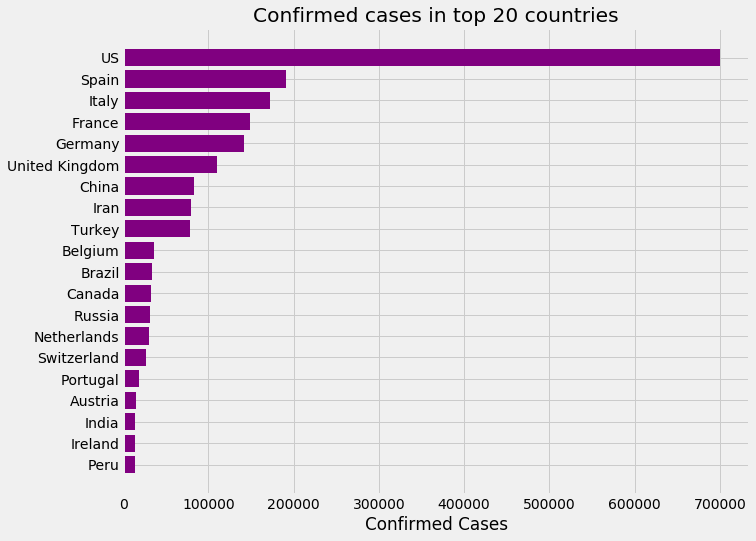

In [54]:
top_20_confirmed = confirmed_df.head(20).sort_values('Confirmed', ascending=True)
countries = top_20_confirmed['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_confirmed['Confirmed'].values

plt.figure(figsize=(10,8))
plt.barh(y_pos, performance, align='center', color='purple', tick_label=performance)
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Confirmed Cases')
plt.title('Confirmed cases in top 20 countries')
plt.show()

### Deaths

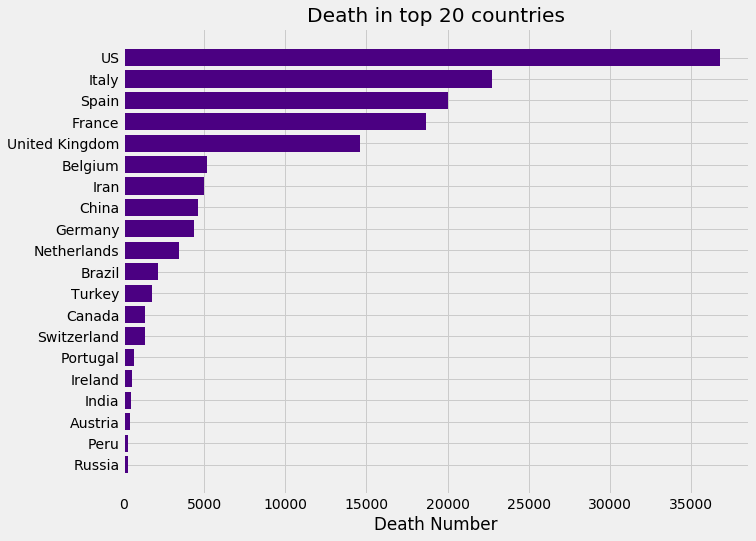

In [27]:
top_20_death= confirmed_df.head(20).sort_values('Deaths', ascending=True)
countries = top_20_death['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_death['Deaths'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='indigo')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Death Number')
plt.title('Death in top 20 countries')
plt.show()

### Death Rate

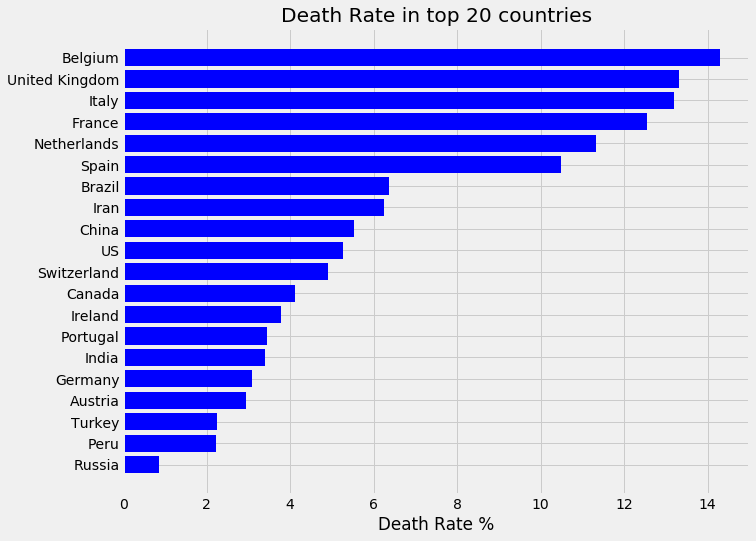

In [28]:
top_20_death_rate= confirmed_df.head(20).sort_values('Death Rate', ascending=True)
countries = top_20_death_rate['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_death_rate['Death Rate'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='blue')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Death Rate %')
plt.title('Death Rate in top 20 countries')
plt.show()

### Recovered Number

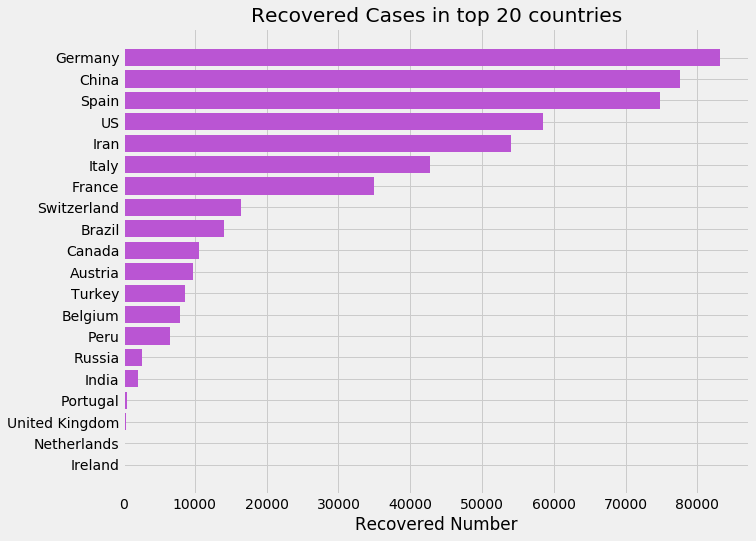

In [29]:
top_20_recovered= confirmed_df.head(20).sort_values('Recovered', ascending=True)
countries = top_20_recovered['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_recovered['Recovered'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='mediumorchid')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Recovered Number')
plt.title('Recovered Cases in top 20 countries')
plt.show()

### Recovery Rate

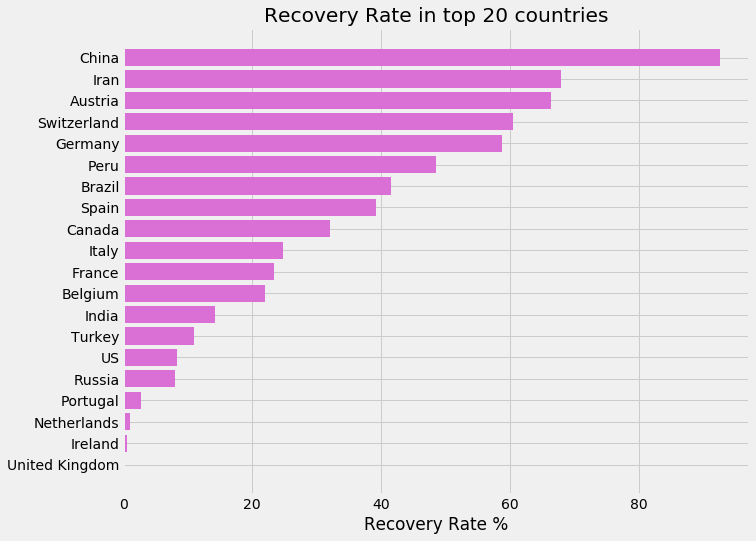

In [30]:
top_20_recovery_rate= confirmed_df.head(20).sort_values('Recovery Rate', ascending=True)
countries = top_20_recovery_rate['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_recovery_rate['Recovery Rate'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='orchid')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Recovery Rate %')
plt.title('Recovery Rate in top 20 countries')
plt.show()

### Active Cases

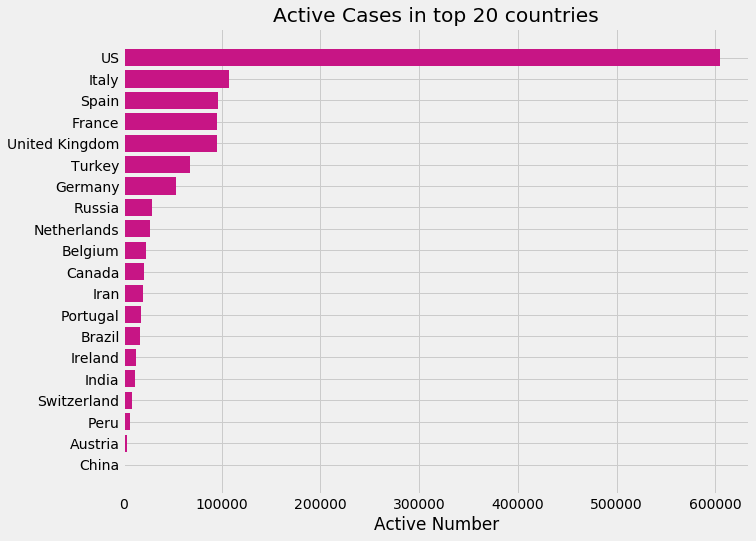

In [31]:
top_20_active= confirmed_df.head(20).sort_values('Active', ascending=True)
countries = top_20_active['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_active['Active'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='mediumvioletred')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('Active Number')
plt.title('Active Cases in top 20 countries')
plt.show()

### New Cases

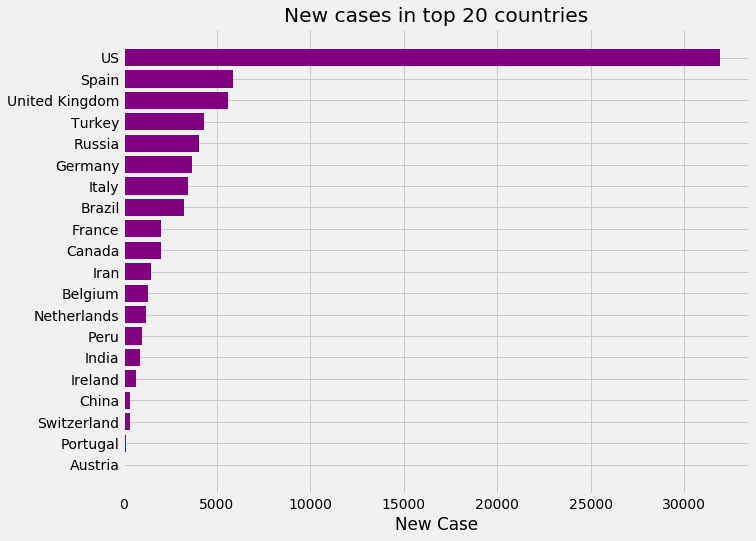

In [32]:
top_20_confirmed = confirmed_df.head(20).sort_values('New Case', ascending=True)
countries = top_20_confirmed['Country/Region'].values
y_pos = np.arange(len(countries))
performance = top_20_confirmed['New Case'].values

plt.figure(figsize=(10, 8))
plt.barh(y_pos, performance, align='center', color='purple')
plt.style.use('fivethirtyeight')
plt.yticks(y_pos, countries)
plt.xlabel('New Case')
plt.title('New cases in top 20 countries')
plt.show()

### Comparison between China and the rest of the world

In [33]:
compare_df = pd.concat([China_current, ROW_current], axis=0)
compare_df.index = ['China', 'ROW']
compare_df

Date  Confirmed  Deaths  Recovered   Active  New Case
China 2020-04-17      83760    4636      77552     1572       357
ROW   2020-04-17    2156431  149186     490791  1516454     87187

# Case change over time

### China

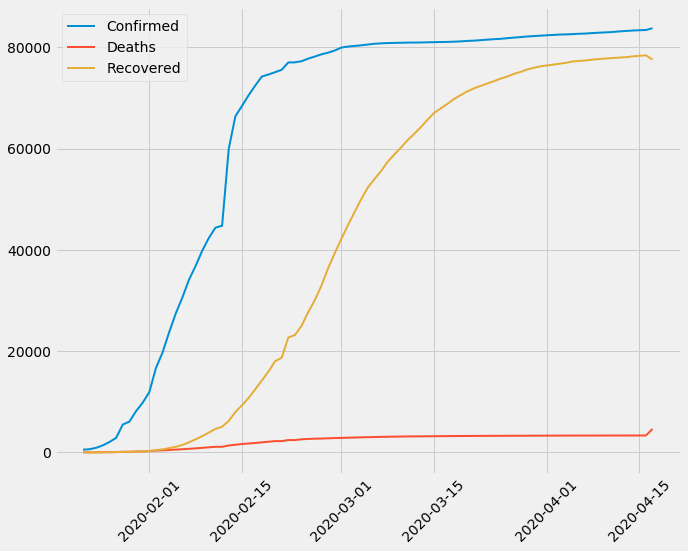

In [34]:
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['Confirmed'],  label='Confirmed', linewidth=2, )
plt.plot(daily_china['Date'], daily_china['Deaths'],  label='Deaths', linewidth=2)
plt.plot(daily_china['Date'], daily_china['Recovered'],  label='Recovered', linewidth=2)
plt.xticks(rotation='45')
plt.legend()

### Rest of the World

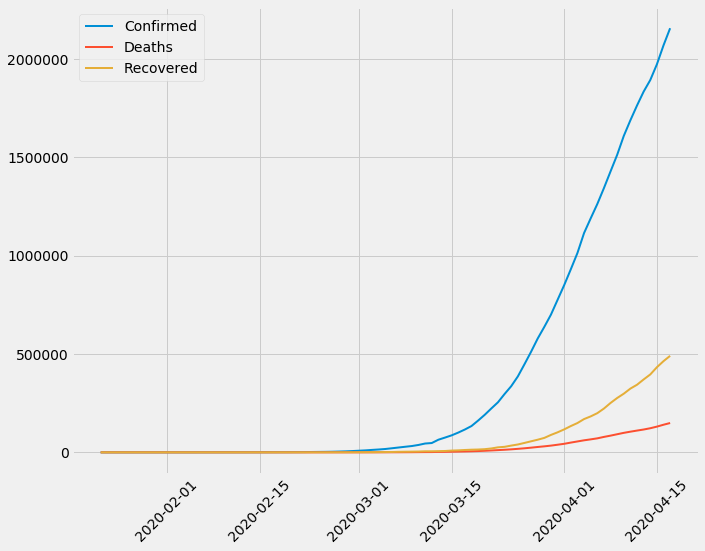

In [35]:
plt.figure(figsize=(10,8))
plt.plot(daily_ROW['Date'], daily_ROW['Confirmed'],  label='Confirmed', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Deaths'],  label='Deaths', linewidth=2)
plt.plot(daily_ROW['Date'], daily_ROW['Recovered'],  label='Recovered', linewidth=2)
plt.xticks(rotation='45')
plt.legend()

### US

In [36]:
for country in top_20_confirmed['Country/Region']:
    def change_over_time(country):
        x = df_grouped[df_grouped['Country/Region']==country]['Date']
        y1 = df_grouped[df_grouped['Country/Region']==country]['Confirmed']
        y2 = df_grouped[df_grouped['Country/Region']==country]['Deaths']
        y3 = df_grouped[df_grouped['Country/Region']==country]['Recovered']
        plt.figure(figsize=(10,8))
        plt.plot(x, y1, label='Confirmed', linewidth=2, marker='o', markevery=7)
        plt.plot(x, y2, label='Deaths', linewidth=2, marker='o', markevery=7)
        plt.plot(x, y3, label='Recovered', linewidth=2, marker='o', markevery=7)
        plt.xticks(rotation='45')
        plt.legend()

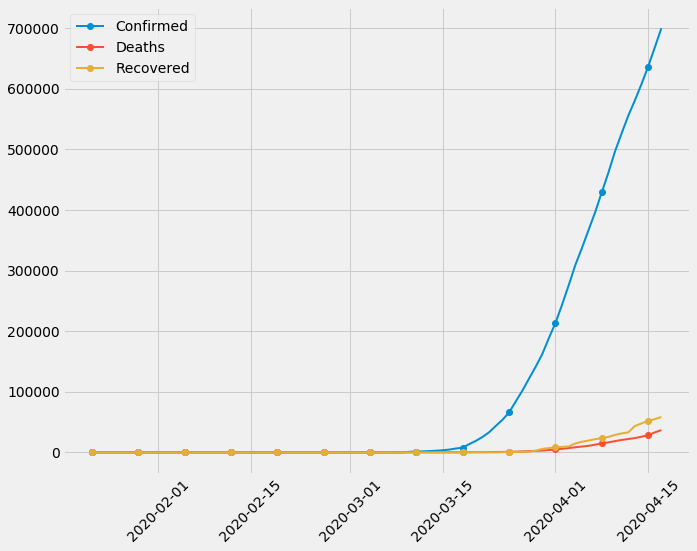

In [38]:
change_over_time('US')

### Italy

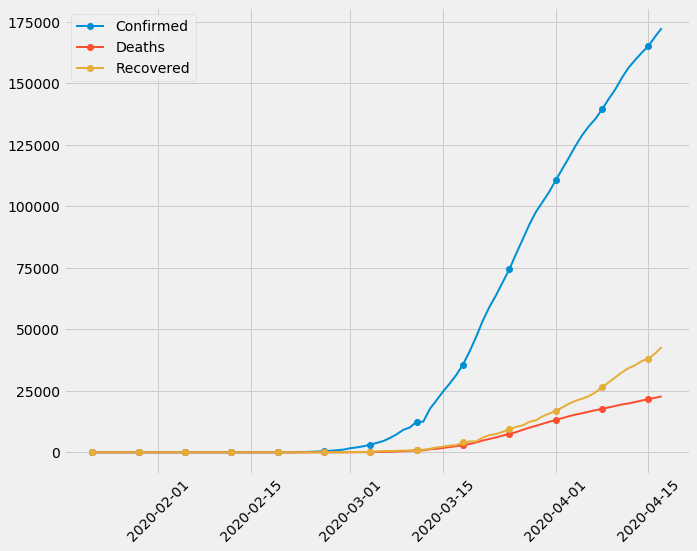

In [37]:
change_over_time('Italy')

### Iran

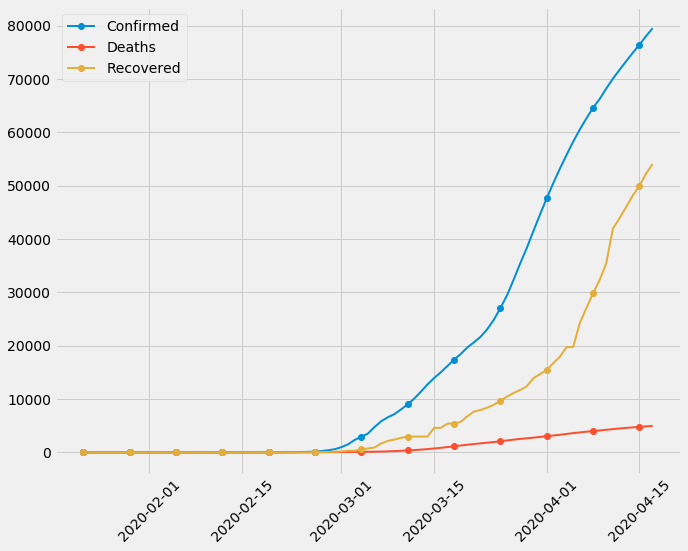

In [39]:
change_over_time('Iran')

### South Korea

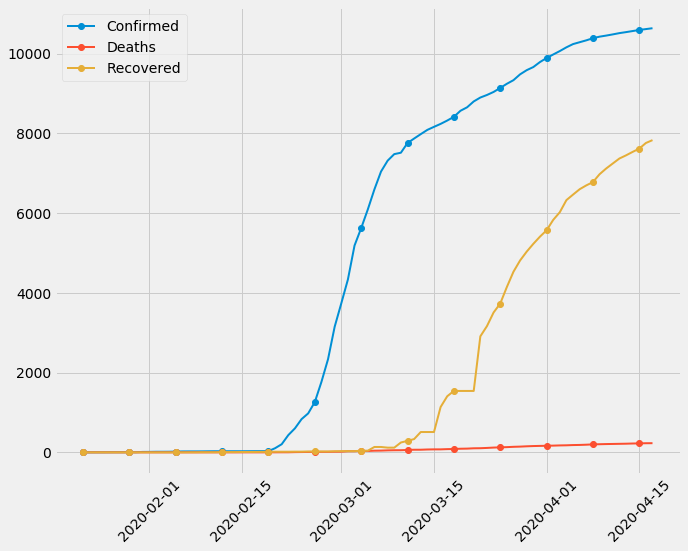

In [40]:
change_over_time('Korea, South')

### Australia

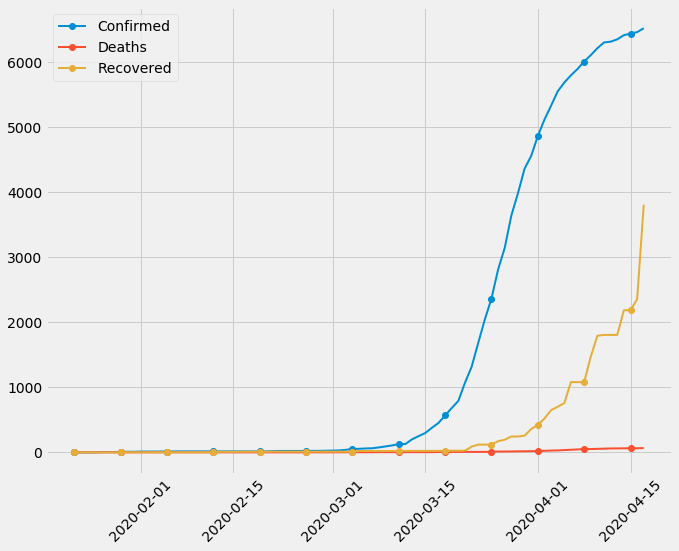

In [41]:
change_over_time('Australia')

## Comparison between China and the Rest of the World

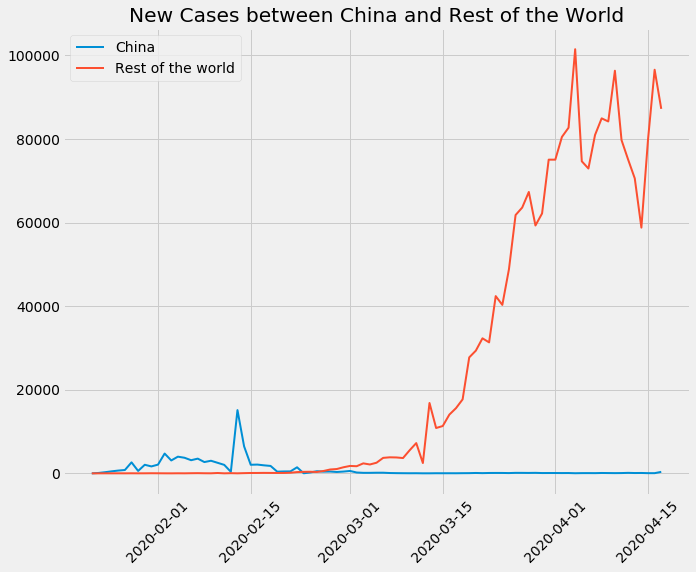

In [42]:
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['New Case'],  label='China', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['New Case'],  label='Rest of the world', linewidth=2, )

plt.xticks(rotation='45')
plt.title('New Cases between China and Rest of the World')
plt.legend()

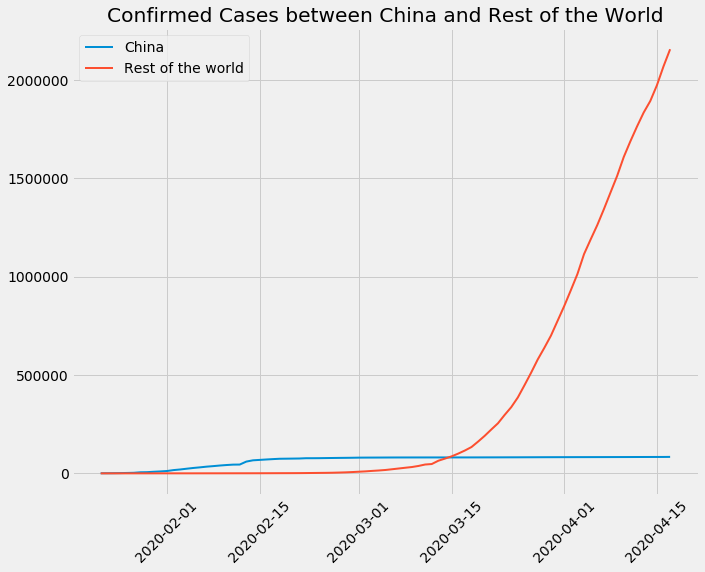

In [43]:
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['Confirmed'],  label='China', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Confirmed'],  label='Rest of the world', linewidth=2, )

plt.xticks(rotation='45')
plt.title('Confirmed Cases between China and Rest of the World')
plt.legend()

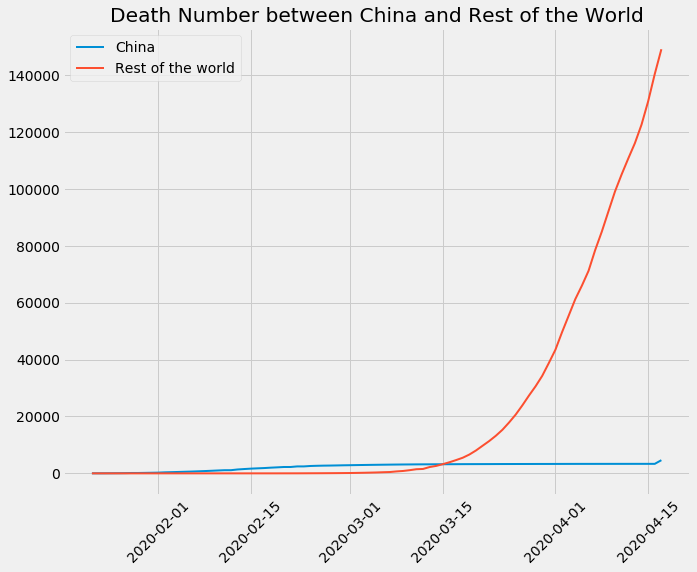

In [44]:
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['Deaths'],  label='China', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Deaths'],  label='Rest of the world', linewidth=2, )

plt.xticks(rotation='45')
plt.title('Death Number between China and Rest of the World')
plt.legend()

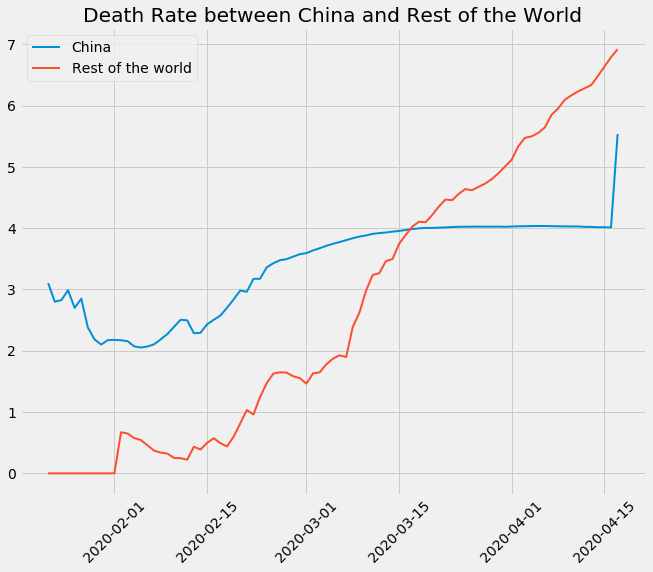

In [45]:
daily_china['Death rate']=daily_china['Deaths']/daily_china['Confirmed']*100
daily_ROW['Death rate']=daily_ROW['Deaths']/daily_ROW['Confirmed']*100
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['Death rate'],  label='China', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Death rate'],  label='Rest of the world', linewidth=2, )

plt.xticks(rotation='45')
plt.title('Death Rate between China and Rest of the World')
plt.legend()

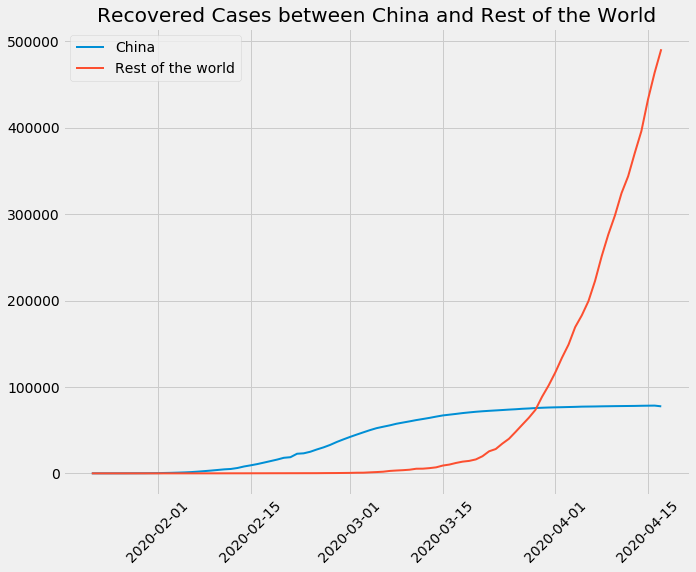

In [46]:
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['Recovered'],  label='China', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Recovered'],  label='Rest of the world', linewidth=2, )

plt.xticks(rotation='45')
plt.title('Recovered Cases between China and Rest of the World')
plt.legend()

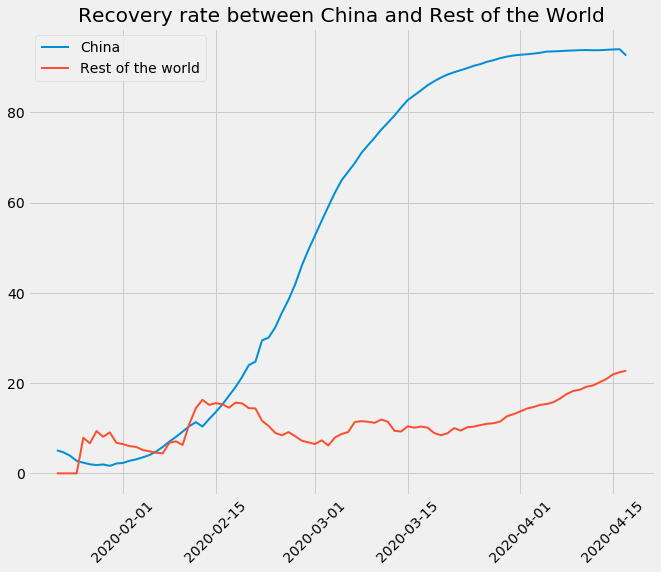

In [47]:
daily_china['Recovery rate']=daily_china['Recovered']/daily_china['Confirmed']*100
daily_ROW['Recovery rate']=daily_ROW['Recovered']/daily_ROW['Confirmed']*100
plt.figure(figsize=(10,8))
plt.plot(daily_china['Date'], daily_china['Recovery rate'],  label='China', linewidth=2, )
plt.plot(daily_ROW['Date'], daily_ROW['Recovery rate'],  label='Rest of the world', linewidth=2, )

plt.xticks(rotation='45')
plt.title('Recovery rate between China and Rest of the World')
plt.legend()

### Comparison amoung a few countries

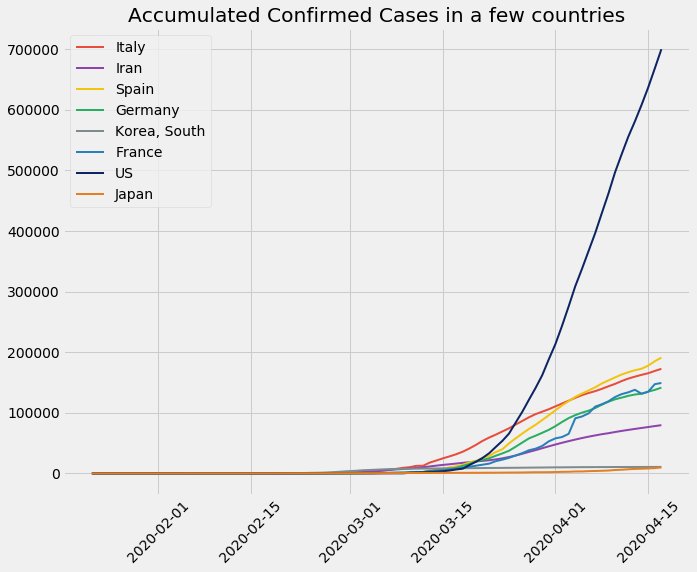

In [48]:
x=df_grouped['Date'].unique()
y1=df_grouped[df_grouped['Country/Region']=='Italy']['Confirmed']
y2=df_grouped[df_grouped['Country/Region']=='Iran']['Confirmed']
y3=df_grouped[df_grouped['Country/Region']=='Spain']['Confirmed']
y4=df_grouped[df_grouped['Country/Region']=='Germany']['Confirmed']
y5=df_grouped[df_grouped['Country/Region']=='Korea, South']['Confirmed']
y6=df_grouped[df_grouped['Country/Region']=='France']['Confirmed']
y7=df_grouped[df_grouped['Country/Region']=='US']['Confirmed']
y8=df_grouped[df_grouped['Country/Region']=='Japan']['Confirmed']
plt.figure(figsize=(10,8))
plt.plot(x, y1,  label='Italy', linewidth=2, c='#e74c3c')
plt.plot(x, y2,  label='Iran', linewidth=2, c='#8e44ad')
plt.plot(x, y3,  label='Spain', linewidth=2, c='#f1c40f')
plt.plot(x, y4,  label='Germany', linewidth=2, c='#27ae60')
plt.plot(x, y5,  label='Korea, South', linewidth=2, c='#7f8c8d')
plt.plot(x, y6,  label='France', linewidth=2, c='#2980b9')
plt.plot(x, y7,  label='US', linewidth=2, c='#0c2461')
plt.plot(x, y8,  label='Japan', linewidth=2, c='#e67e22')
plt.xticks(rotation='45')
plt.title('Accumulated Confirmed Cases in a few countries')
plt.legend()

### New cases increased in European countries

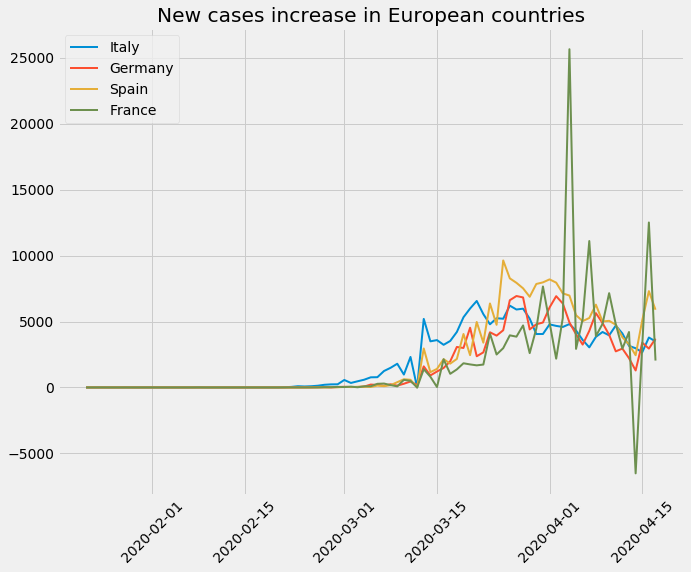

In [49]:
x=df_grouped['Date'].unique()
y1=df_grouped[df_grouped['Country/Region']=='Italy']['New Case']
y2=df_grouped[df_grouped['Country/Region']=='Germany']['New Case']
y3=df_grouped[df_grouped['Country/Region']=='Spain']['New Case']
y4=df_grouped[df_grouped['Country/Region']=='France']['New Case']

plt.figure(figsize=(10,8))
plt.plot(x, y1,  label='Italy', linewidth=2, )
plt.plot(x, y2,  label='Germany', linewidth=2, )
plt.plot(x, y3,  label='Spain', linewidth=2, )
plt.plot(x, y4,  label='France', linewidth=2, )

plt.xticks(rotation='45')
plt.title('New cases increase in European countries')
plt.legend()

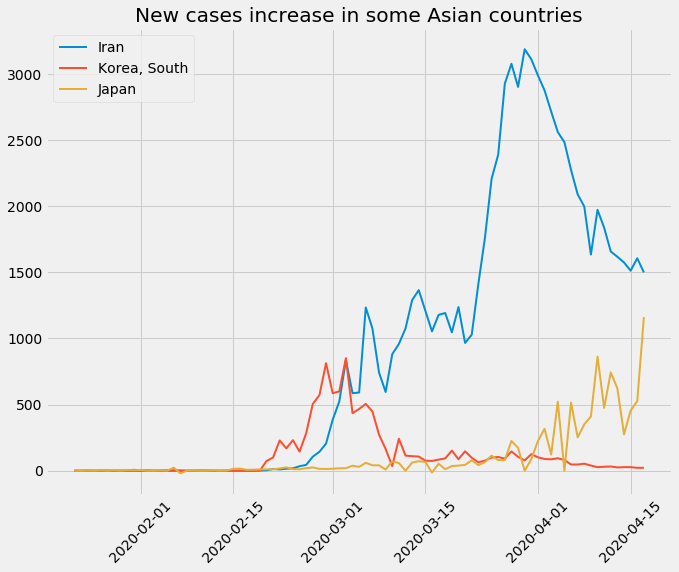

In [50]:
x=df_grouped['Date'].unique()
y1=df_grouped[df_grouped['Country/Region']=='Iran']['New Case']
y2=df_grouped[df_grouped['Country/Region']=='Korea, South']['New Case']
y3=df_grouped[df_grouped['Country/Region']=='Japan']['New Case']

plt.figure(figsize=(10,8))
plt.plot(x, y1,  label='Iran', linewidth=2, )
plt.plot(x, y2,  label='Korea, South', linewidth=2, )
plt.plot(x, y3,  label='Japan', linewidth=2, )

plt.xticks(rotation='45')
plt.title('New cases increase in some Asian countries')
plt.legend()

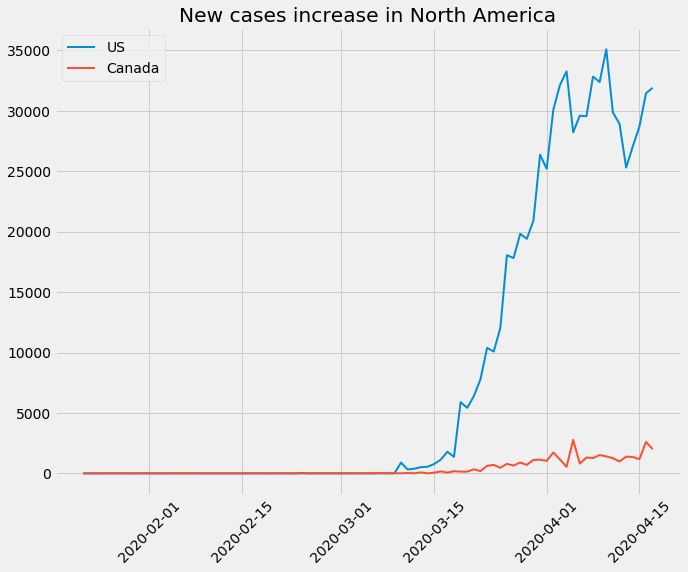

In [51]:
x=df_grouped['Date'].unique()
y1=df_grouped[df_grouped['Country/Region']=='US']['New Case']
y2=df_grouped[df_grouped['Country/Region']=='Canada']['New Case']


plt.figure(figsize=(10,8))
plt.plot(x, y1,  label='US', linewidth=2, )
plt.plot(x, y2,  label='Canada', linewidth=2, )

plt.xticks(rotation='45')
plt.title('New cases increase in North America')
plt.legend()